# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

from sklearn.datasets import make_classification

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

2022-08-14 16:43:07.753537: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-14 16:43:07.756573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 16:43:07.756582: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X, y= sv.datasets.X_illustration, sv.datasets.y_illustration

## Illustrating all oversampling techniques

In this section, we illustrate the output of all oversampling techniques with default parameters on the ```iris0``` dataset.

In [3]:
oversamplers= sv.get_simplex_sampling_oversamplers(within_simplex_sampling='random', n_dim_range=2)

In [4]:
sv.DEAGO in oversamplers

True

In [5]:
#X = X * np.array([100, 200, 150])
#X = X + np.array([1000, 2000, 1500])

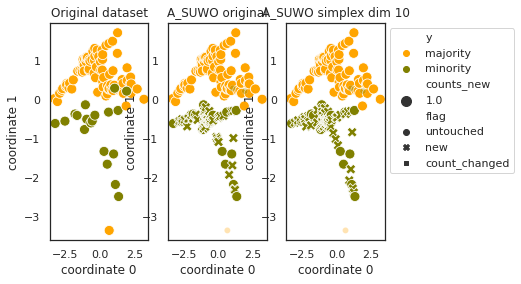

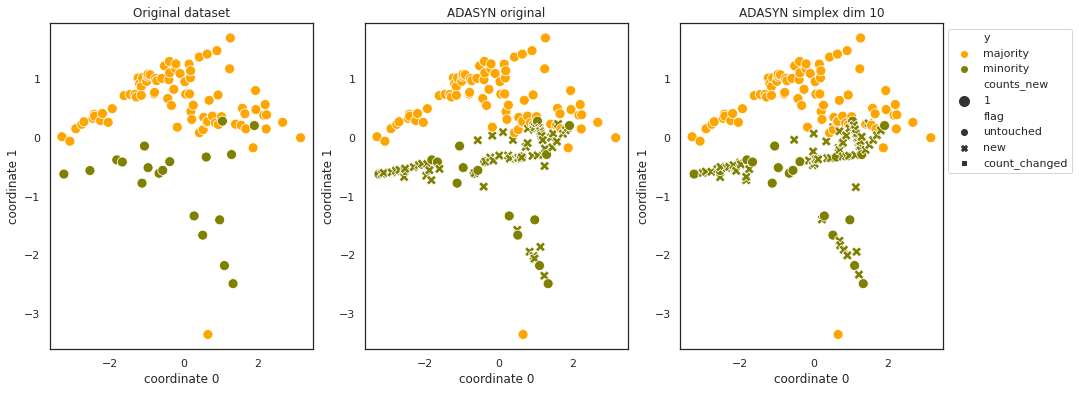

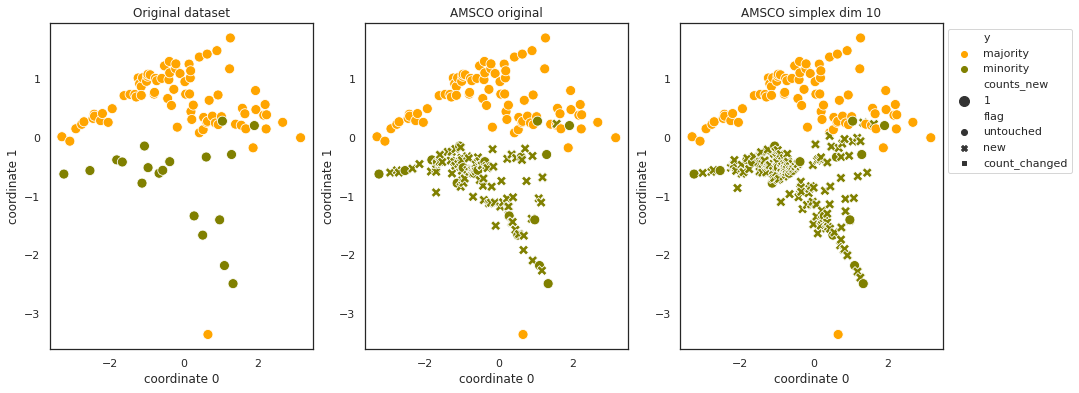

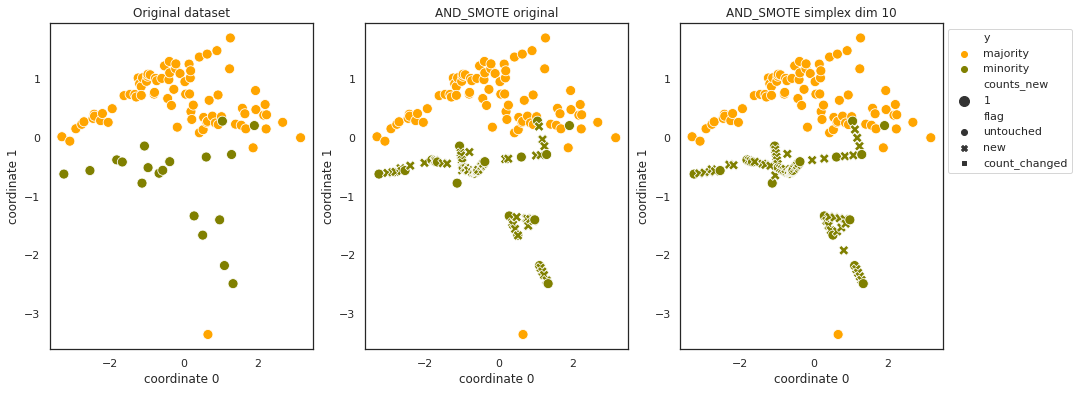

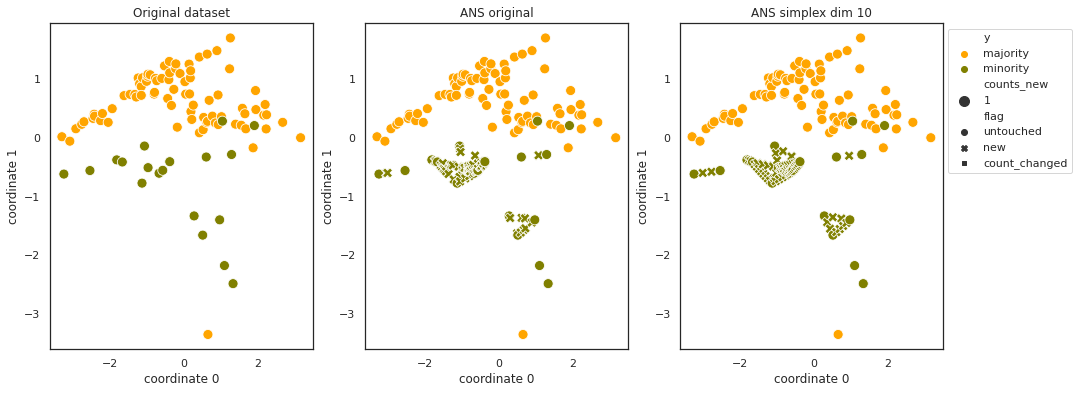

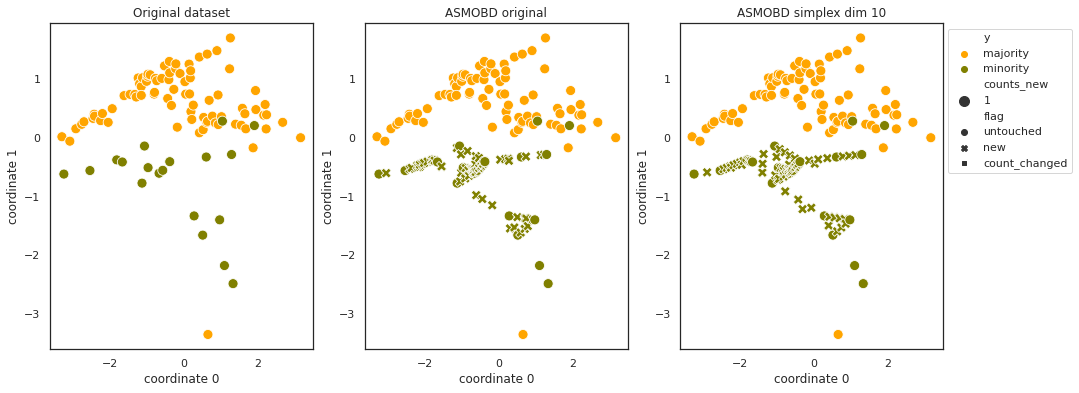

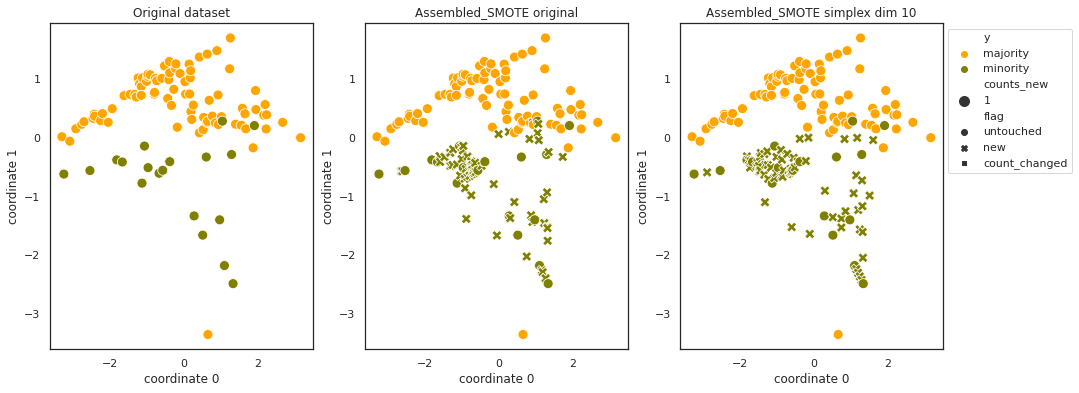

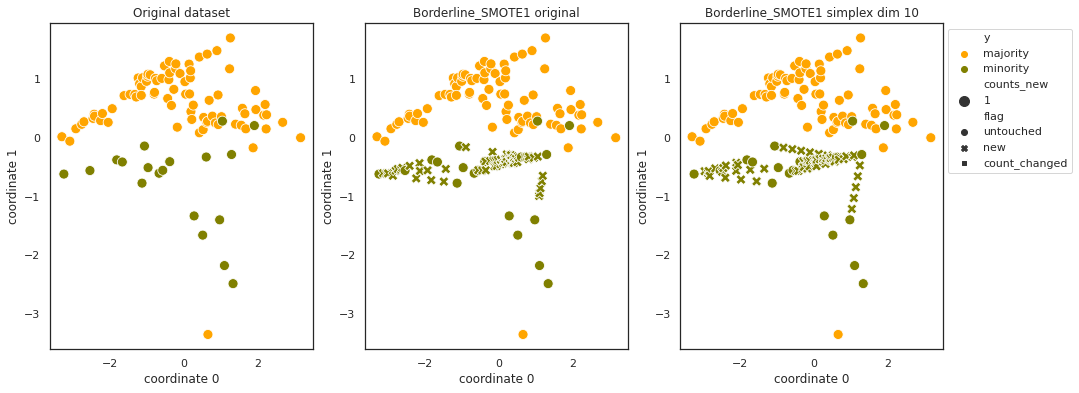

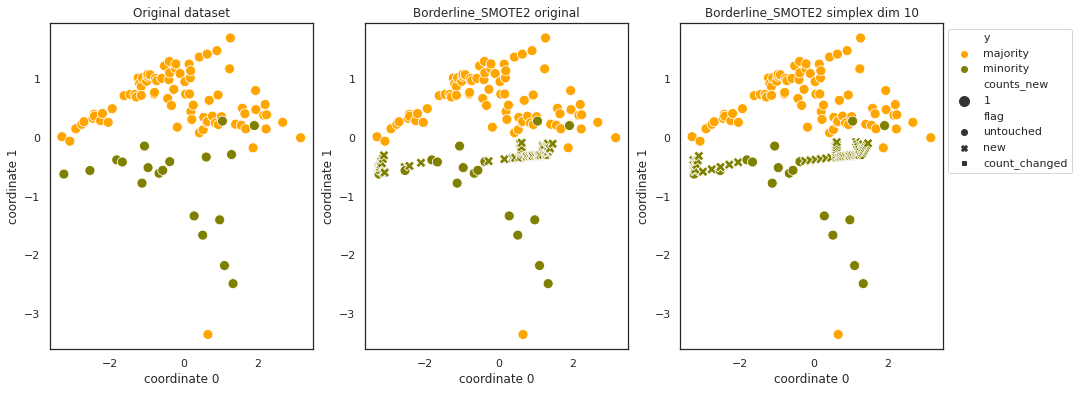

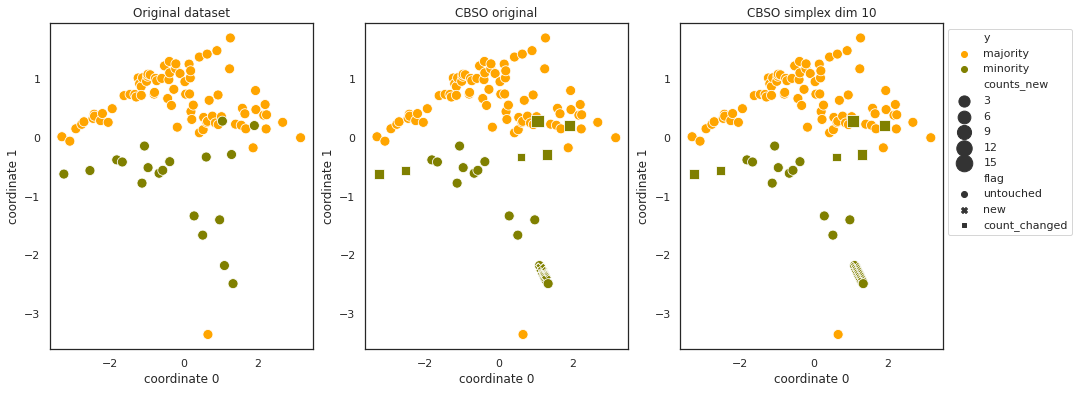

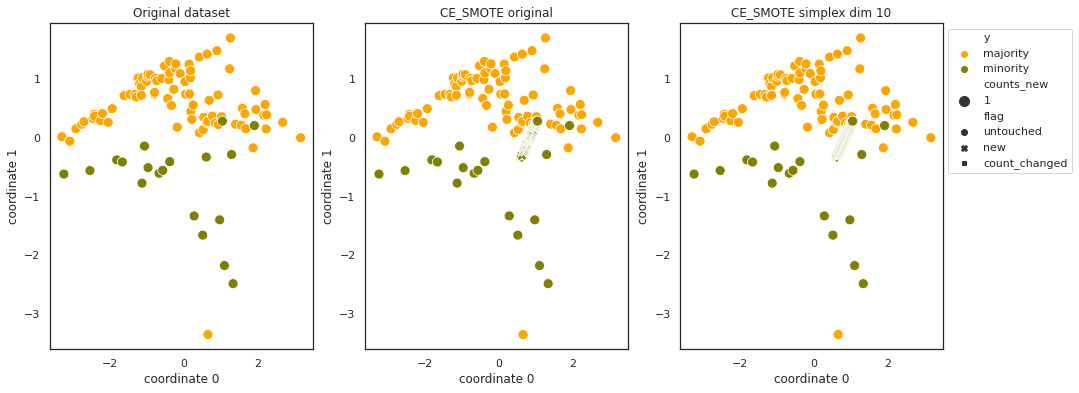

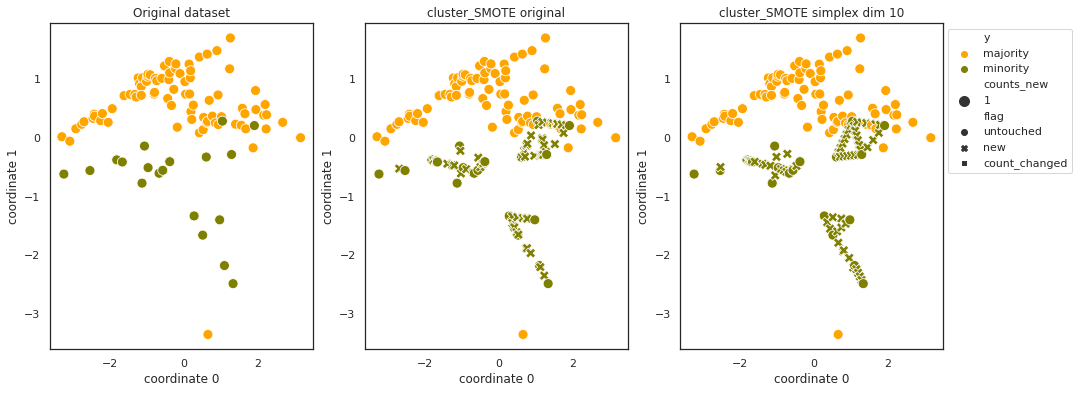

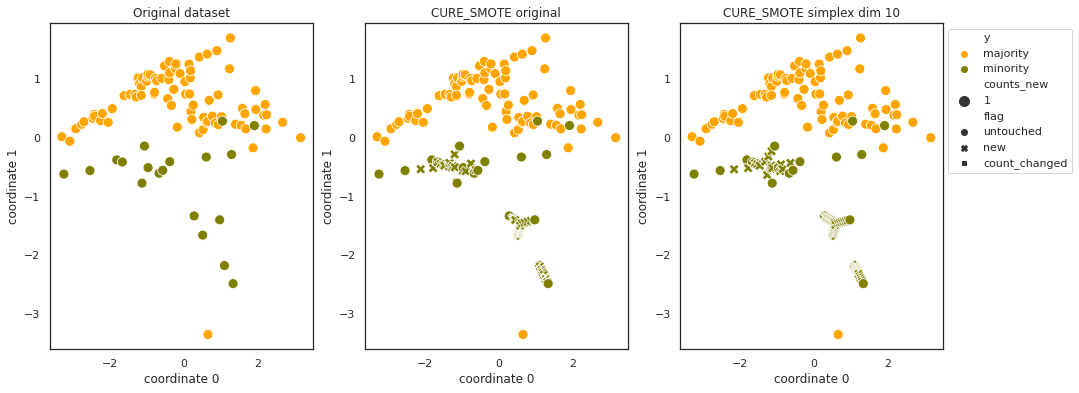

2022-08-14 16:43:42.985892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-14 16:43:42.985946: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-14 16:43:42.985964: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daa): /proc/driver/nvidia/version does not exist
2022-08-14 16:43:42.986158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 2ms/step


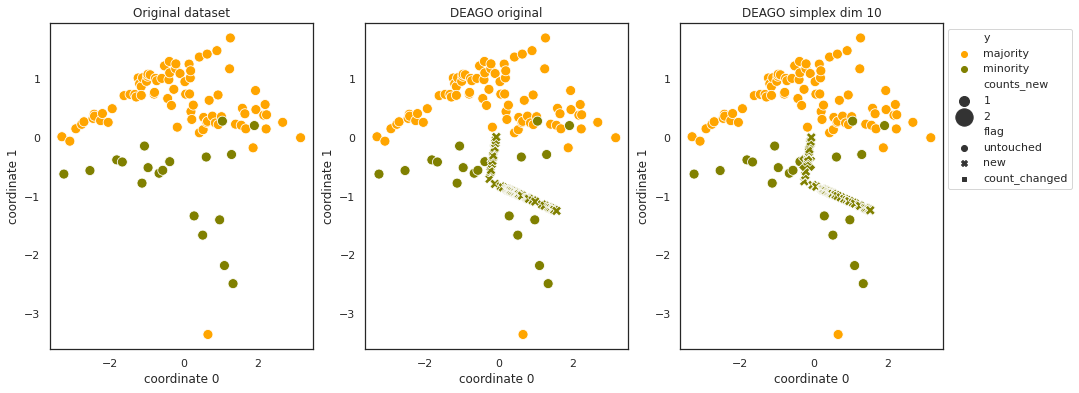

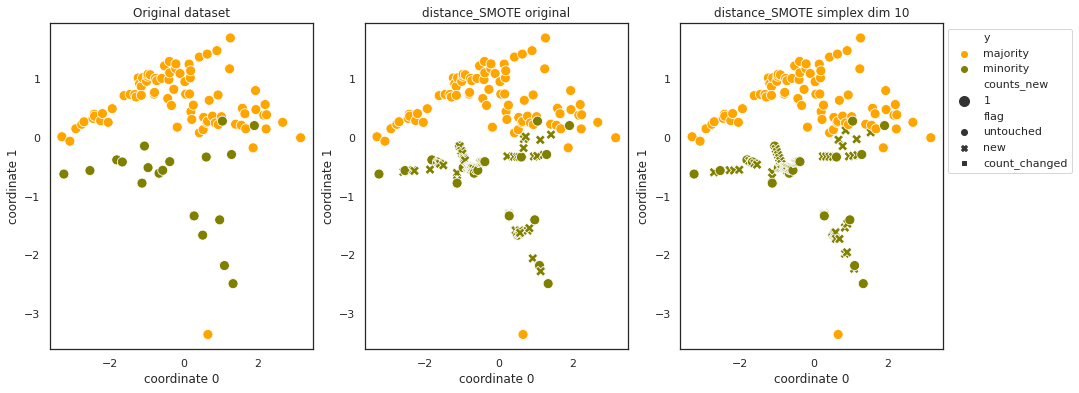

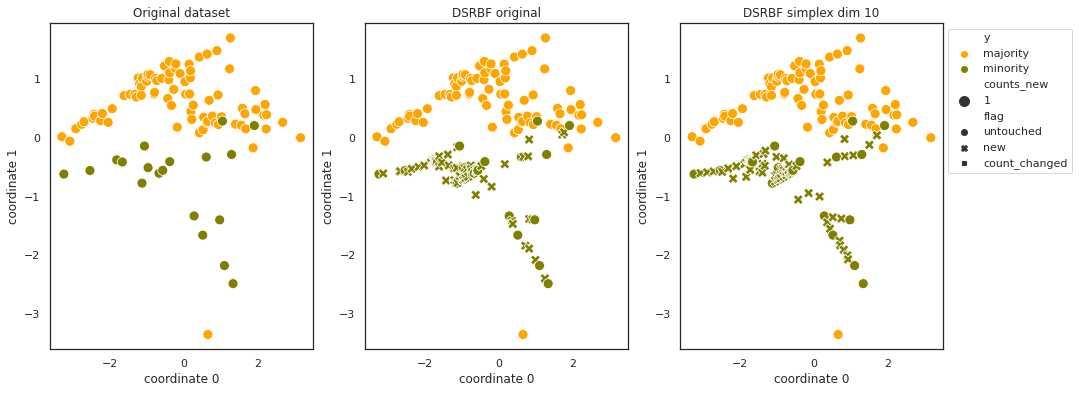

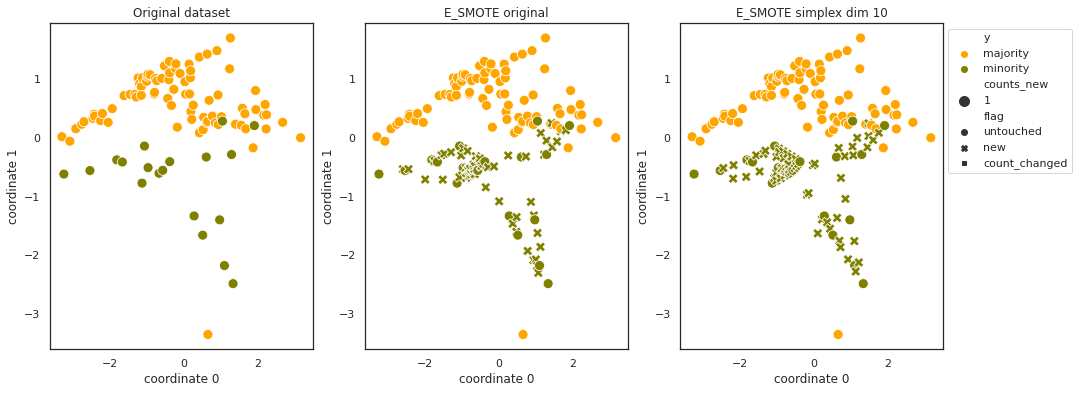

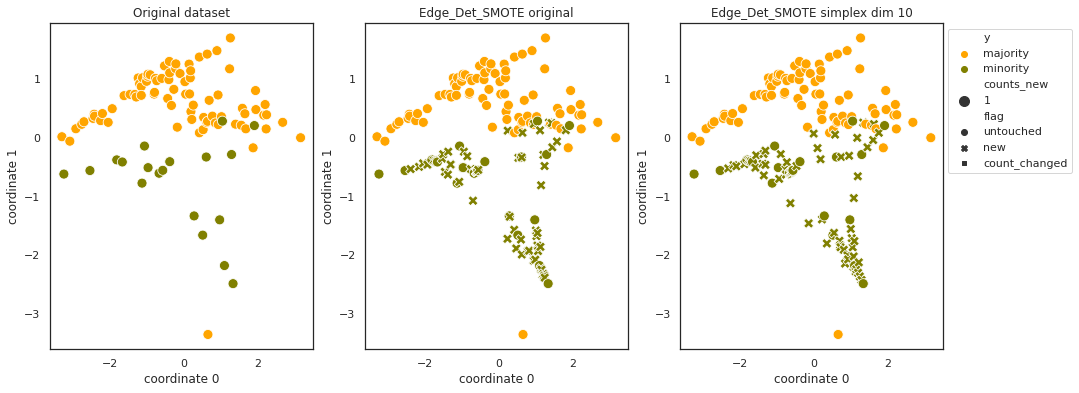

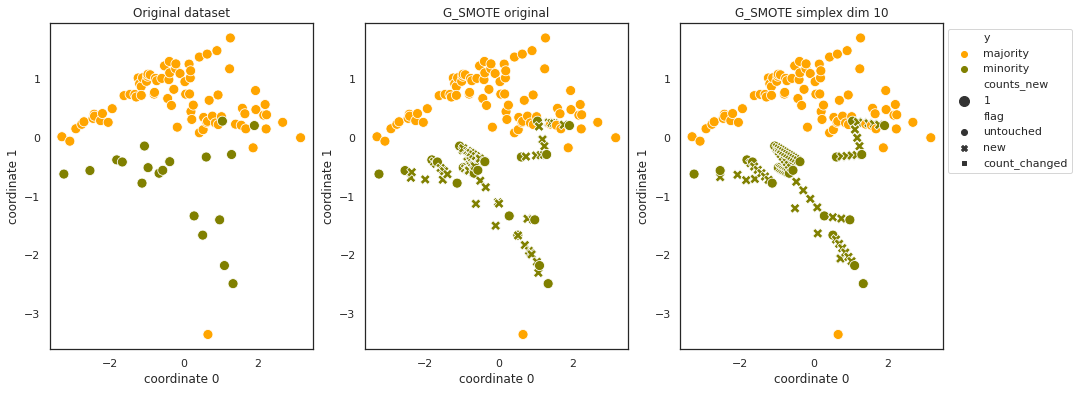

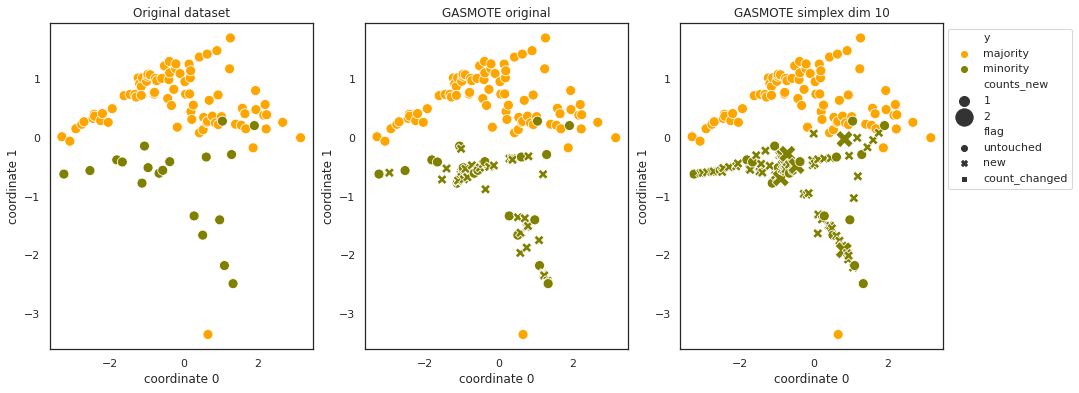

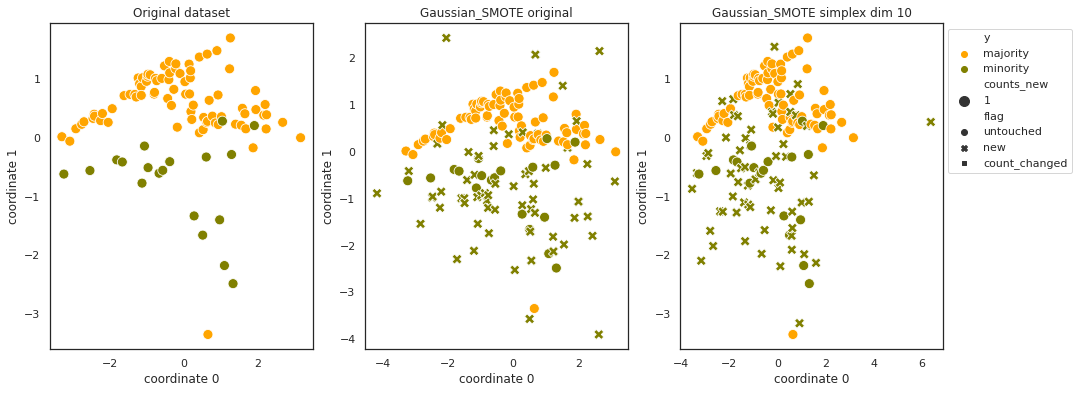

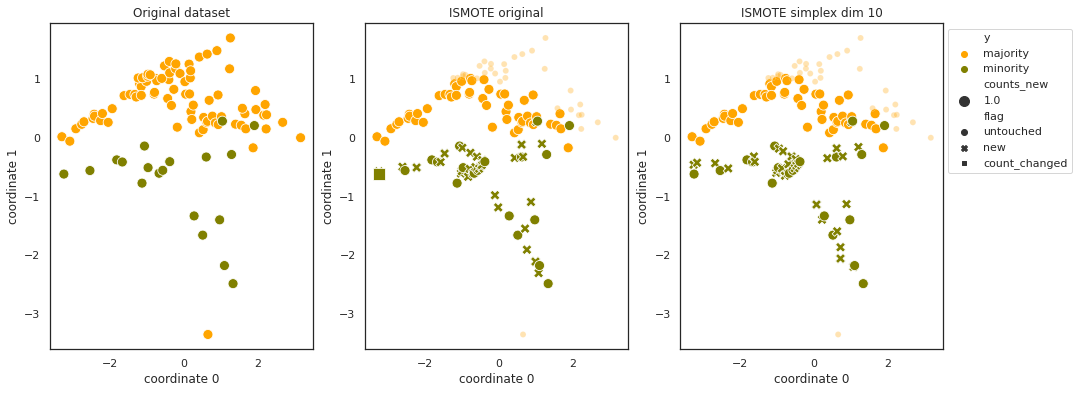

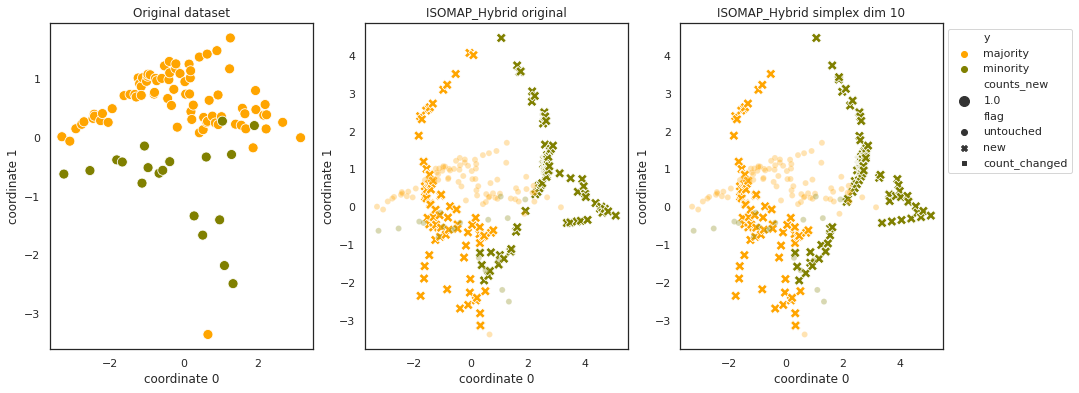

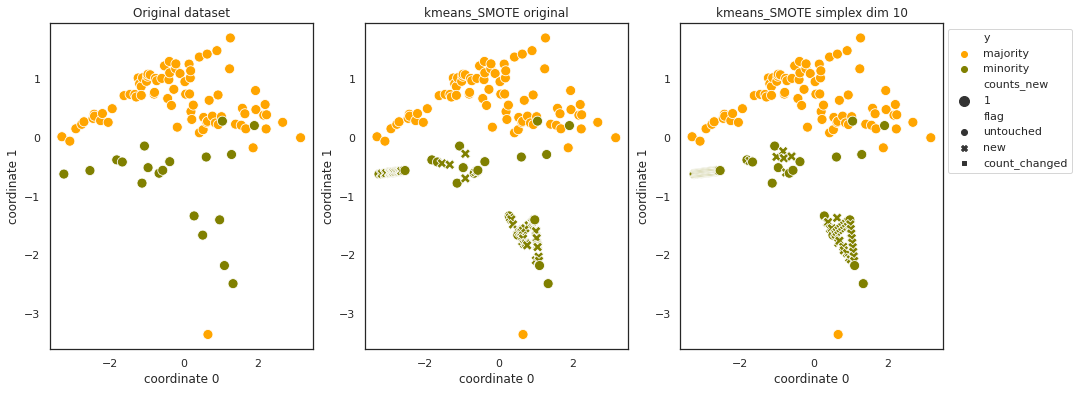

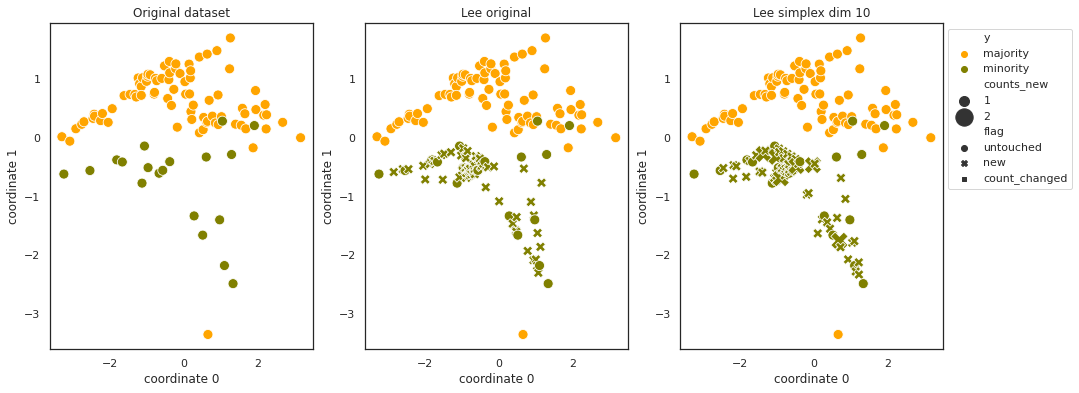

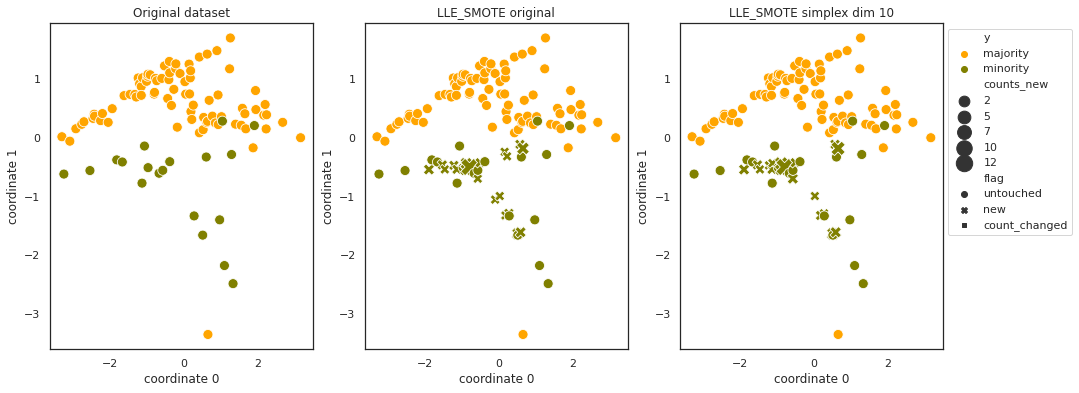

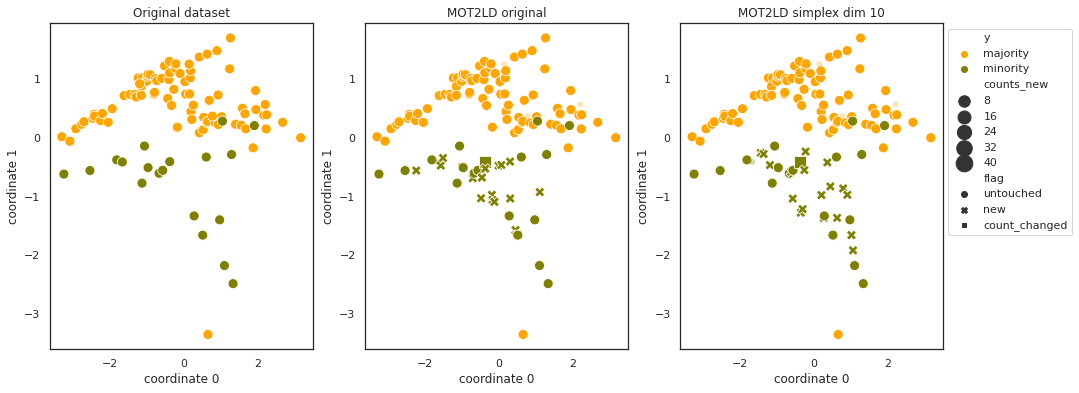

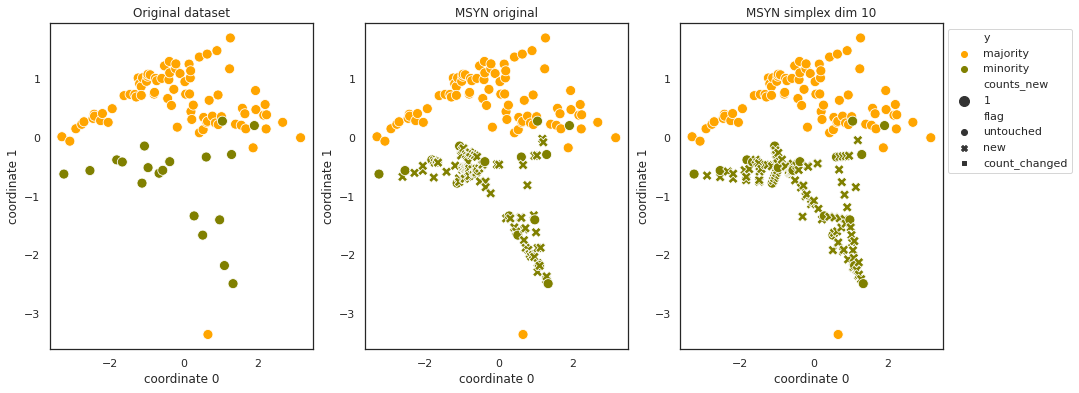

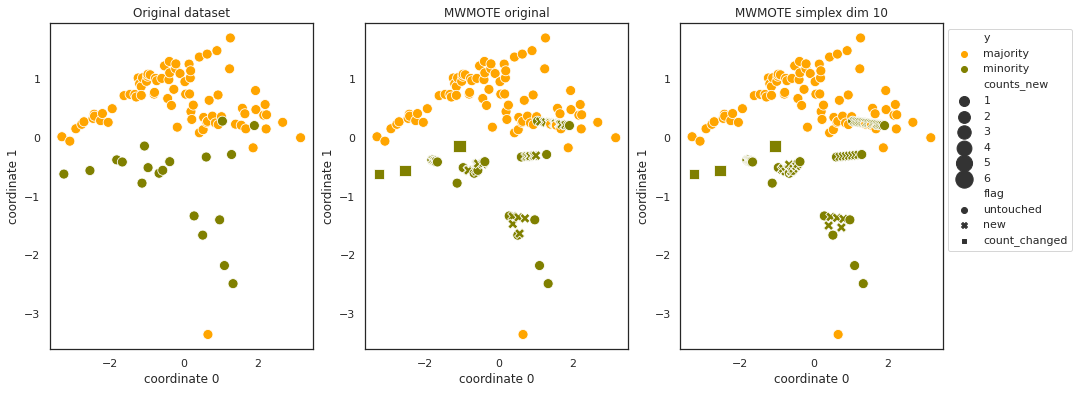

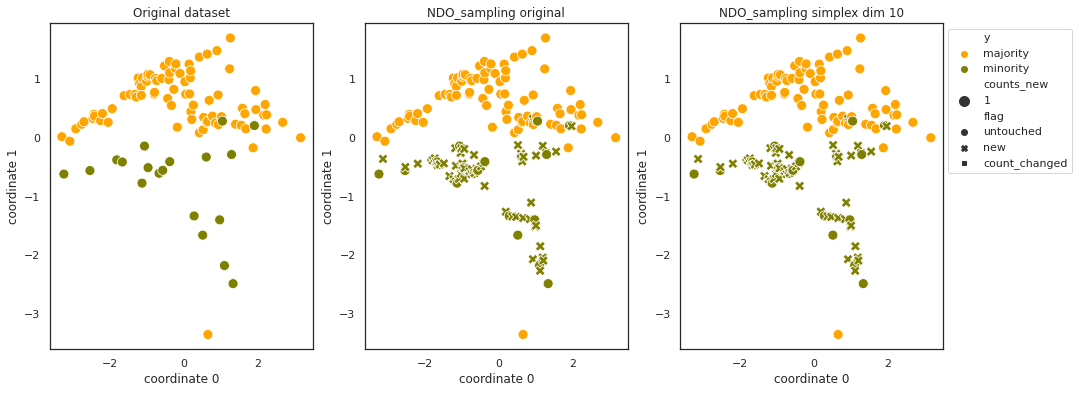

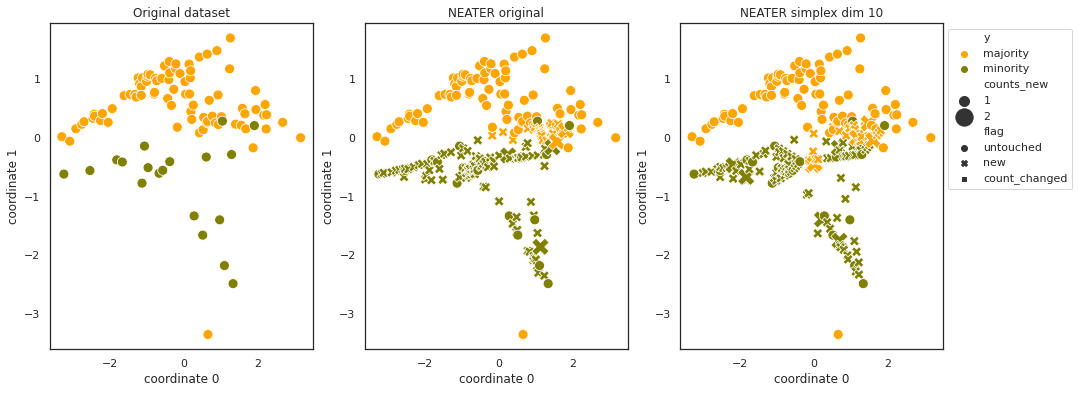

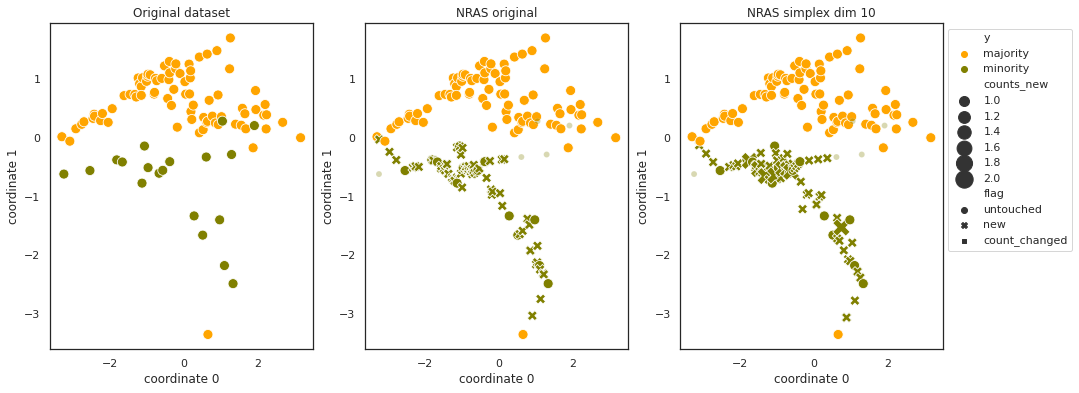

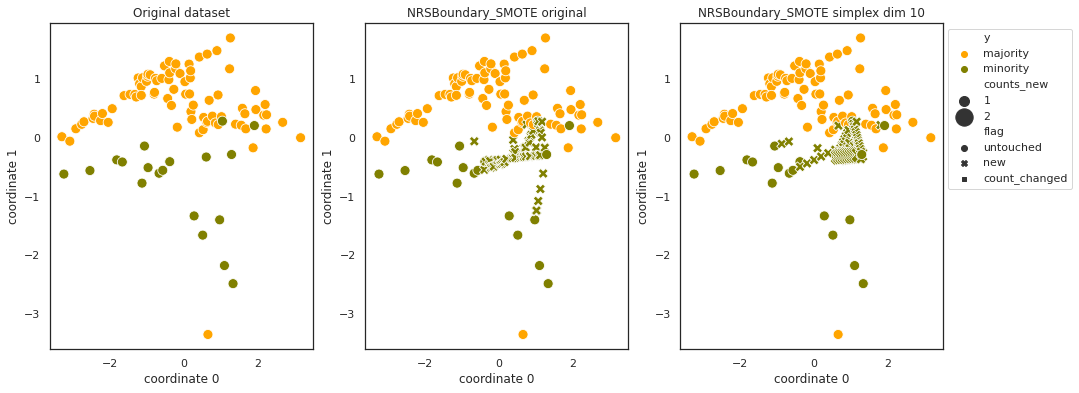

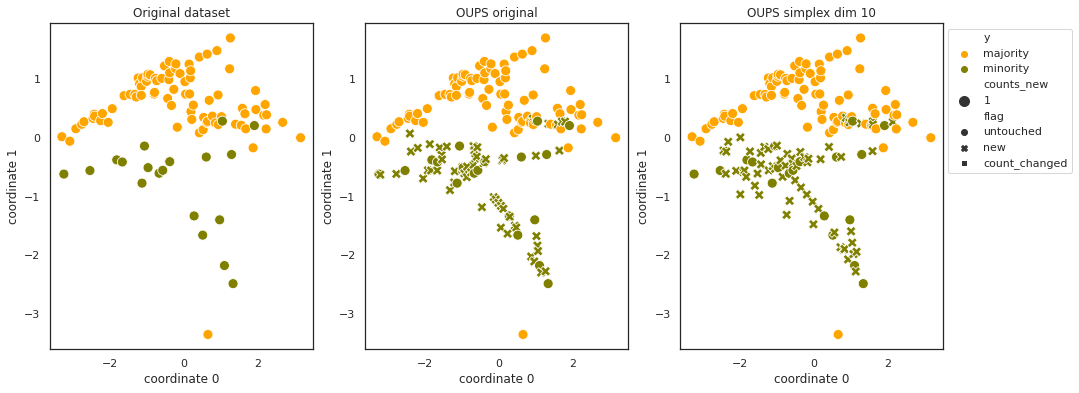

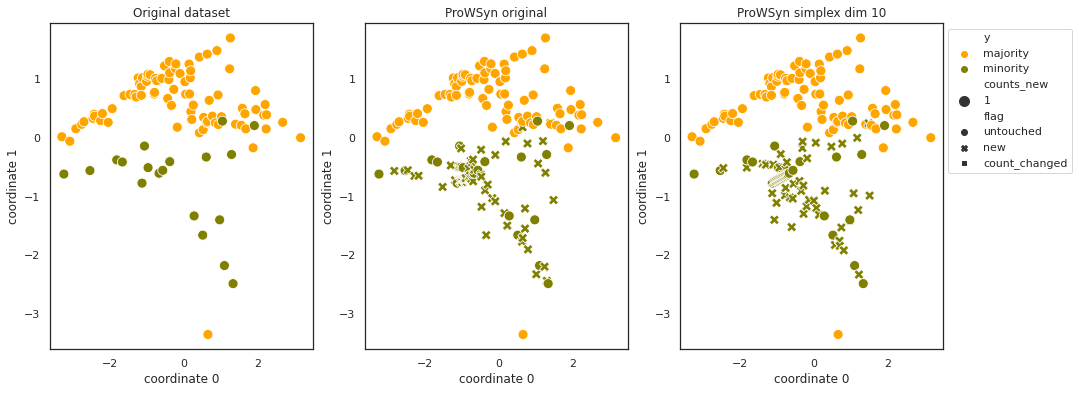

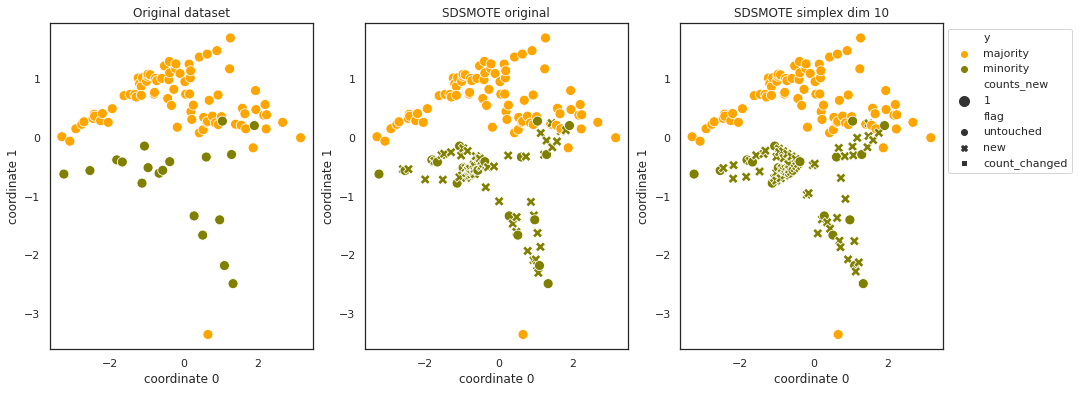

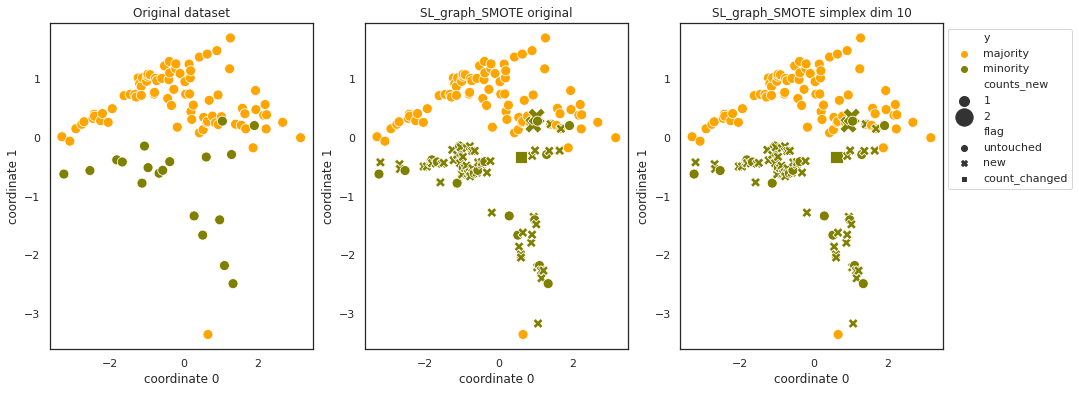

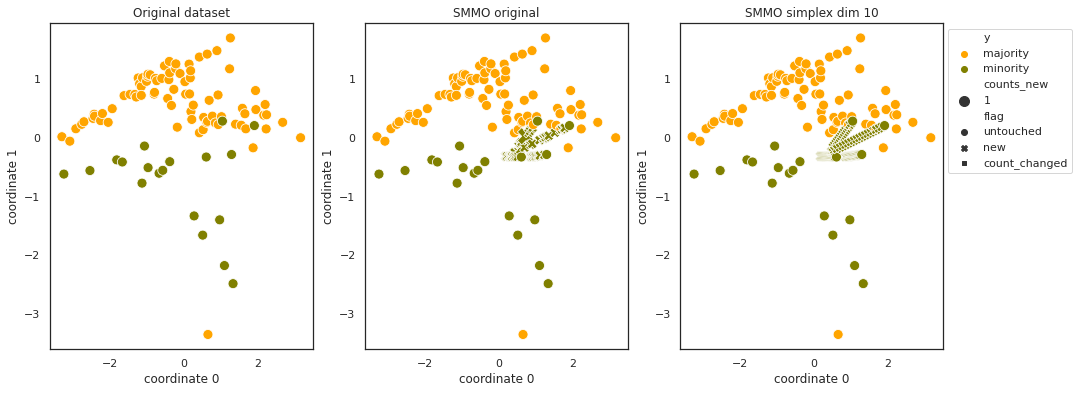

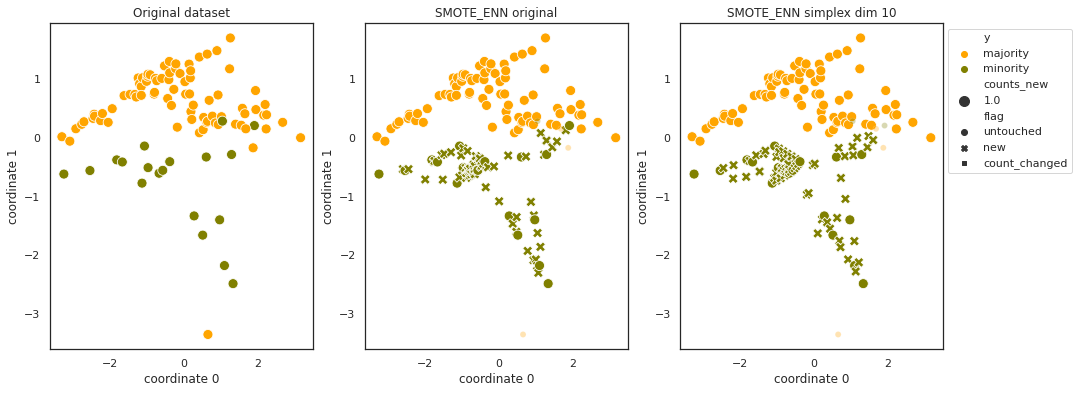

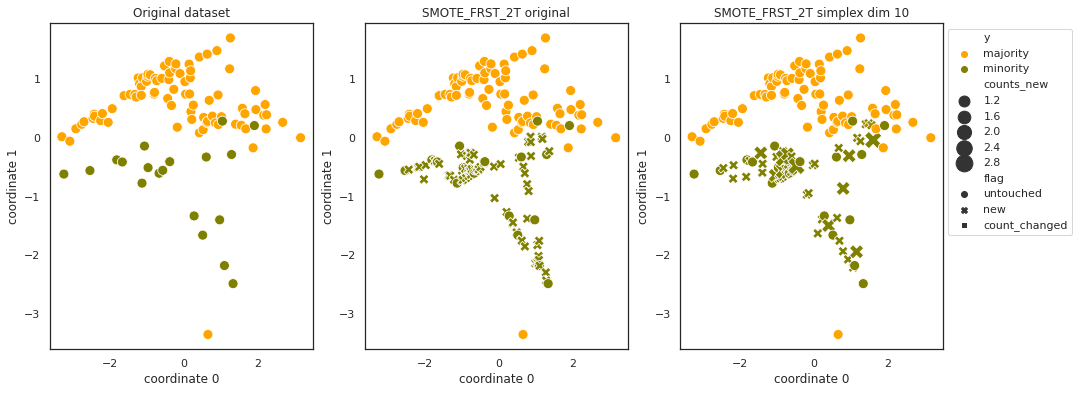

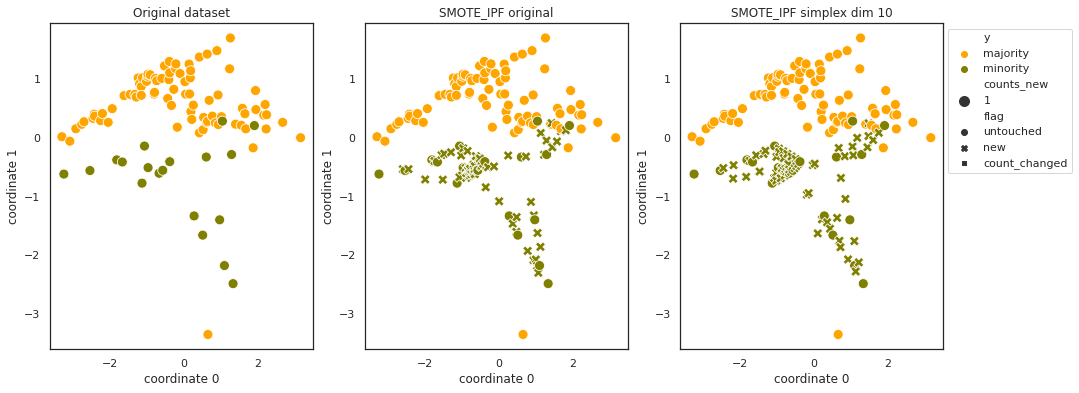

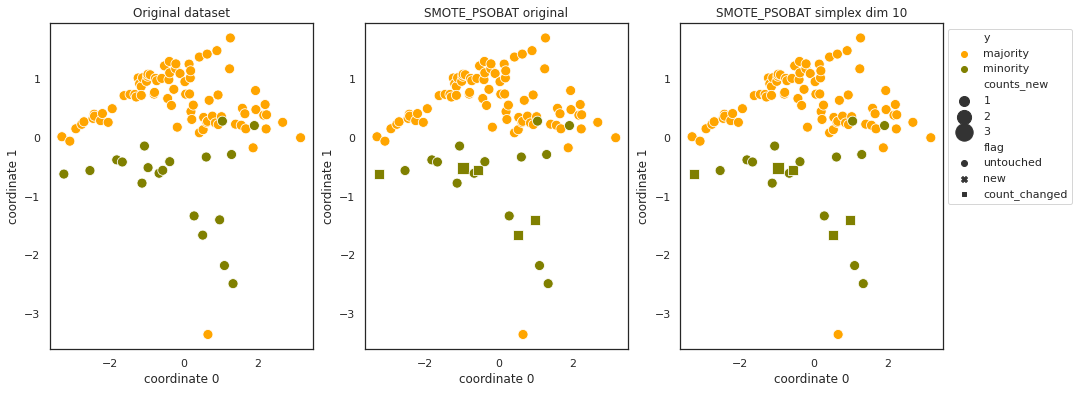

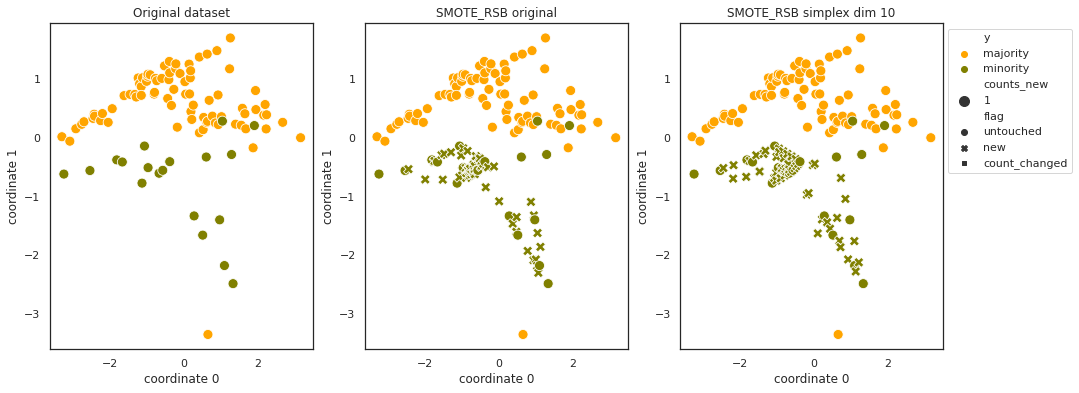

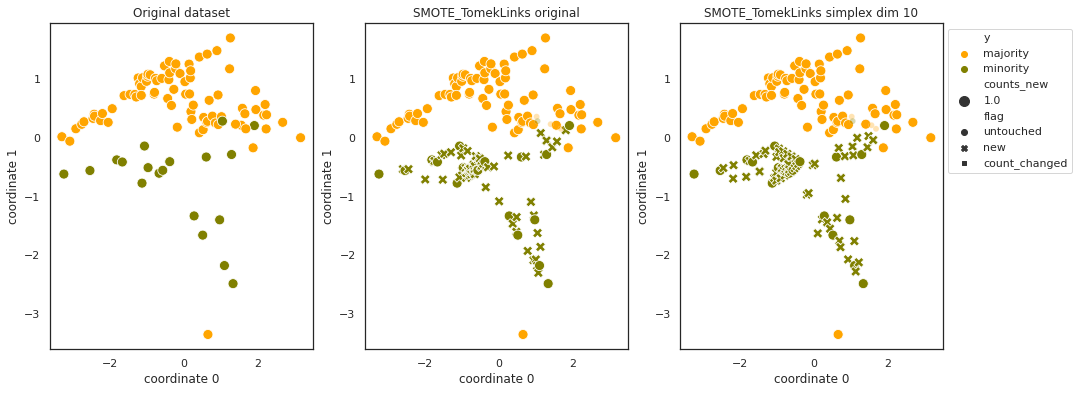

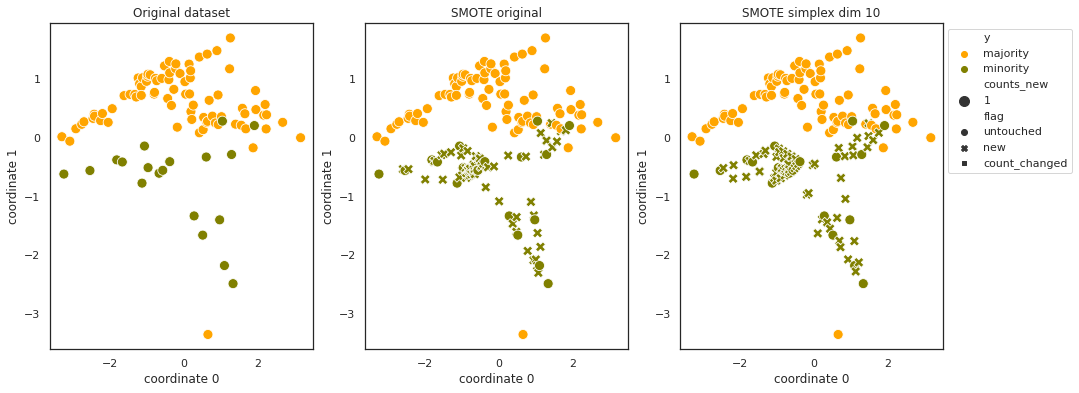

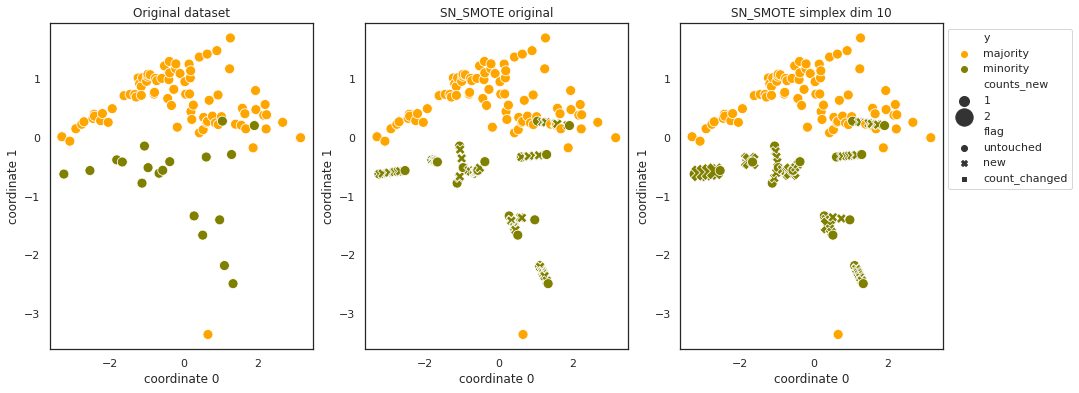

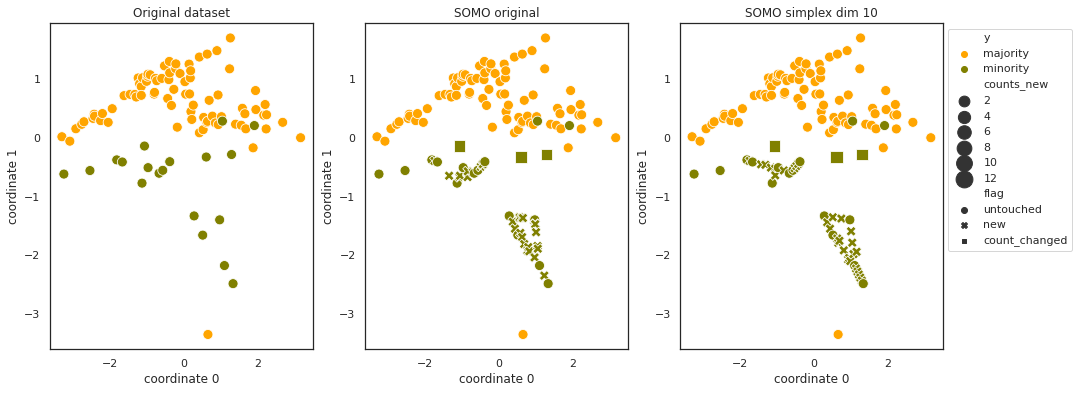

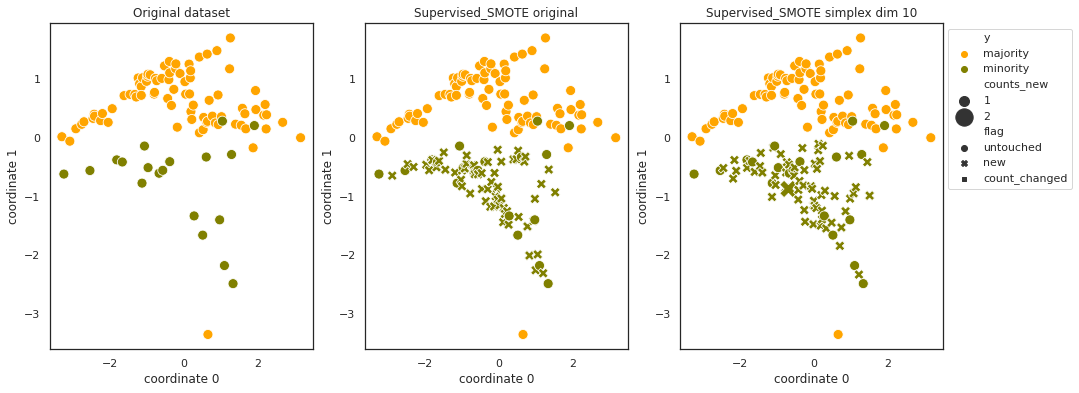

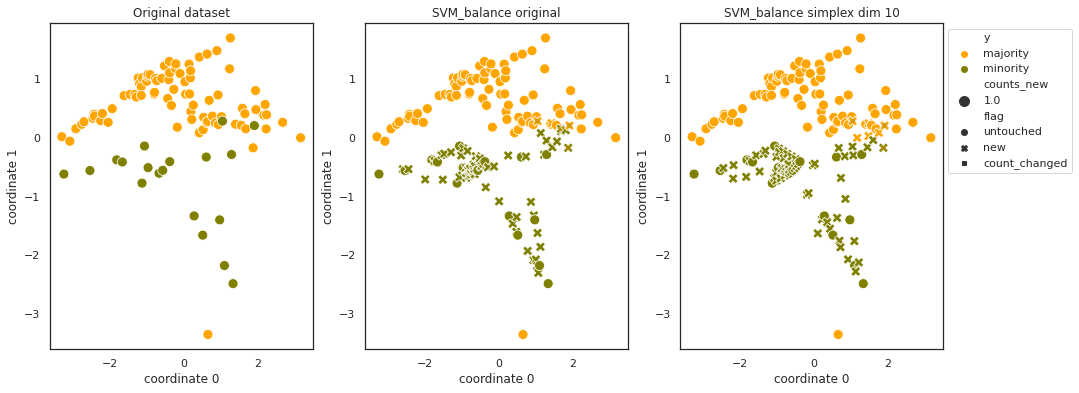

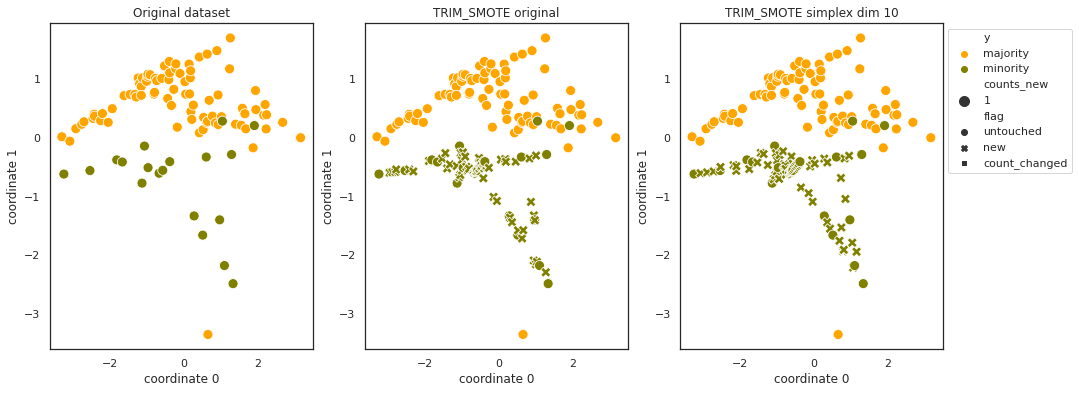

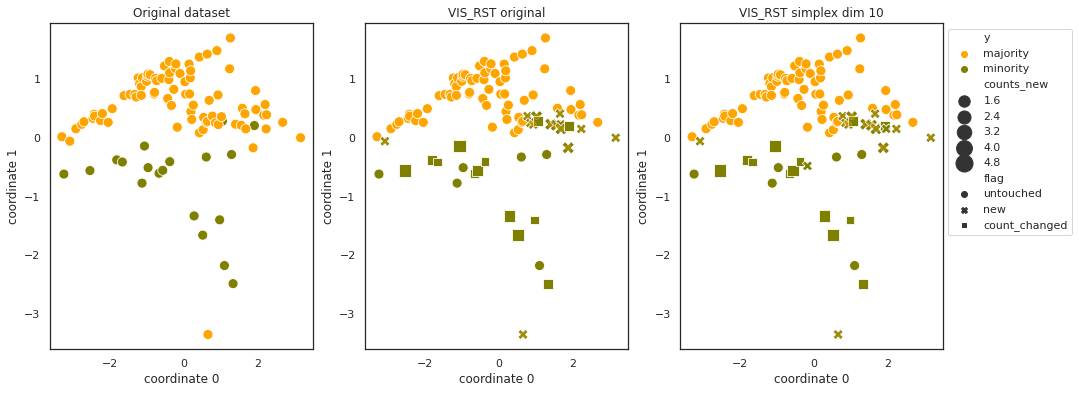

In [6]:
for o in oversamplers:
    oversampler= o(random_state=13)
    X_samp0, y_samp0 = oversampler.sample(X, y)
    ss_params = {'within_simplex_sampling': 'deterministic'}
    oversampler= o(random_state=13, ss_params=ss_params)
    X_samp1, y_samp1 = oversampler.sample(X, y)
    
    fig = sv.visualization.plot_comparison_raw(X=X, y=y, 
                                            X_samp0=X_samp0, 
                                            y_samp0=y_samp0, 
                                            X_samp1=X_samp1, 
                                            y_samp1=y_samp1, 
                                            title0=o.__name__ + " original", 
                                            title1=o.__name__ + " simplex dim 10")
    plt.show()
